In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [5]:
# Load the data
boston_pickle = pickle.load(open('../data/boston_housing_clean.pickle', 'rb'))

In [6]:
boston_pickle.keys()

dict_keys(['dataframe', 'description'])

In [22]:
boston_data = boston_pickle['dataframe']
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
boston_description = boston_pickle['description']
boston_description

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

# KFold Cross Validation
- Define the KFold instance and indicate thee number of splits with `n_splits=k`.
- Split the data into k equal subsets (or "folds") using `kf.split` and passing the X data.
- Iterate over the folds and train the model with the folds of every iteration.

In [15]:
X = boston_data.drop('MEDV', axis=1) # axis=1 means column
Y = boston_data['MEDV']

In [1]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

NameError: name 'KFold' is not defined

In [21]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))# 2/3 of the data
    print("Test index:", test_index[:10], len(test_index))# 1/3 of the data
    print('')

Train index: [ 1  3  4  5  7  8 10 11 12 13] 337
Test index: [ 0  2  6  9 15 17 19 23 25 26] 169

Train index: [ 0  2  6  9 10 11 12 13 15 17] 337
Test index: [ 1  3  4  5  7  8 14 16 22 27] 169

Train index: [0 1 2 3 4 5 6 7 8 9] 338
Test index: [10 11 12 13 18 20 21 24 28 31] 168



In [41]:
from sklearn.metrics import r2_score

scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    #Takes the rows of X and Y that are in the train_index and test_index
    X_train, X_test, Y_train, Y_test = (
        X.iloc[train_index, :], X.iloc[test_index, :], Y[train_index], Y[test_index])
    
    print(X_train.shape)  # Should be (337, number_of_columns_in_X)
    print(Y_train.shape)  # Should be (337,)    
    
    lr.fit(X_train, Y_train)
    
    y_pred = lr.predict(X_test)
    
    score = r2_score(Y_test.values, y_pred)
    
    scores.append(score)
    
scores


(337, 13)
(337,)
(337, 13)
(337,)
(338, 13)
(338,)


[0.7299009094033564, 0.7736953689090584, 0.7308635545795278]

# Now scaling the data

- Reference: https://medium.com/codex/why-scaling-your-data-is-important-1aff95ca97a2#:~:text=Scaling%20the%20data%20can%20help,for%20it%20to%20work%20well.

It's important to scale the data to transform all the values within the same range
to make sure that there's no dominance of one feature over the other, and to ensure 
this values does not affect the calculations of the model.

These are some of the most common scaling methods:

1. **Standardization**: The mean of each feature becomes 0 and the standard deviation becomes 1.
2. **Normalization**: The values of each feature are between 0 and 1.
3. **Min-Max Scaling**: The minimum value of each feature becomes 0 and the maximum value becomes 1.

In [42]:
from sklearn.preprocessing import StandardScaler

scores = []
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, Y_train, Y_test = (
        X.iloc[train_index, :], X.iloc[test_index, :], Y[train_index], Y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    X_test_s = s.transform(X_test)
    
    lr.fit(X_train_s, Y_train)
    
    y_pred = lr.predict(X_test_s)
    
    score = r2_score(Y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.7299009094033484, 0.7736953689090602, 0.7308635545795259]

**The results are the same because scaling the data for a linear regression model without any regularization doesn't make a difference.**

# How to reduce the steps of the cross-validation process
Use the Pipeline class to combine the scaling and the model in a single object.

In [45]:
from sklearn.pipeline import Pipeline

s = StandardScaler()
lr = LinearRegression()

estimator = Pipeline([('scaler', s), ('linear_regression', lr)])
estimator

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [46]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(estimator, X, Y, cv=kf)# kf is the KFold instance

In [47]:
len(predictions)

506

In [48]:
r2_score(Y, predictions)

0.7459048418974497

**We have the same score on prediction but it has been simplified**

# Hyperparameter tuning
Hyperparameters are the parameters that are not learned by the model, but are set by the data scientist.  
We'll use `cross-validation` to find which are the the parameters that generate the best model (the best model is the one that generalizes the best outside our sample).  

The hyperparameter tuning increases the complexity of the model, so we need to be careful with overfitting.  
We can use `geomspace` to generate a range of values that are distributed in a logarithmic scale.  
These values are used to test the hyperparameters and we'll call these values as `alphas`.

Example: `np.geomspace(1e-9, 1e-1, num=5)` generates 5 values between 1e-9 and 1e-1.  

## What do we do with these alphas?
We'll loop through th values and execute the Pipeline with the algorithm that we want to test.

### IMPORTANT: Always scale the data before testing the hyperparameters.

In [54]:
alphas = np.geomspace(1e-9, 1e0, num=10) # [1*10^-9, 1*10^-8, ... , 1*10^0 or just 1]
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

## Alpha values
- The higher the alpha, the more the coefficients are penalized, thus the model is simpler.
- The lower the alpha, the less the coefficients are penalized, thus the model is more complex.

In [56]:
from sklearn.linear_model import Lasso

scores = []
coefs = []

s = StandardScaler()
lr = LinearRegression()

for alpha in alphas:    
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([('scaler', s), ('lasso_regression', las)])
    
    predictions = cross_val_predict(estimator, X, Y, cv=kf)
    
    score = r2_score(Y, predictions)
    
    scores.append(score)

In [58]:
list(zip(alphas, scores)) 

[(np.float64(1e-09), 0.7459048425571004),
 (np.float64(1e-08), 0.7459048485633066),
 (np.float64(1e-07), 0.7459049076871981),
 (np.float64(1e-06), 0.7459055112351136),
 (np.float64(1e-05), 0.7459114023650099),
 (np.float64(0.0001), 0.7459710825597664),
 (np.float64(0.001), 0.746601349970949),
 (np.float64(0.01), 0.7455227183431096),
 (np.float64(0.1), 0.6916689479078031),
 (np.float64(1.0), -0.00030523065856824516)]

In [59]:
Lasso(alpha=1.0).fit(X, Y).coef_

array([-0.        ,  0.00200304, -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.0011461 ,
       -0.        ,  0.00093346, -0.06099671])

In [60]:
Lasso(alpha=1e-6).fit(X, Y).coef_

array([-1.65221000e-02,  3.78241633e-03,  3.61562968e-03,  2.54863396e-01,
       -1.83591288e+00,  3.03727884e-01,  1.37509385e-04, -1.34558202e-01,
        3.21644578e-02, -1.35893004e-03, -9.42568389e-02,  9.89840716e-04,
       -6.04393586e-02])

Text(0, 0.5, '$R^2$')

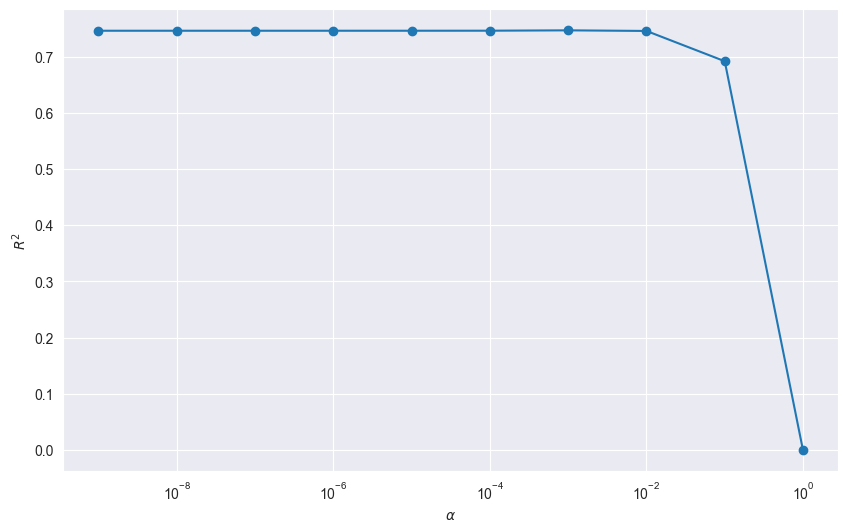

In [61]:
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$')
# This graph means that from 1e-2 to 1e-9 the model does not get any better
# So it's better to use the simplest model knowing that the score is the same
# But the complexity is lower

# Using Polynomial Features

In [67]:
from sklearn.preprocessing import PolynomialFeatures

scores = []
alphas = np.geomspace(0.001, 10, 5)
pf = PolynomialFeatures(degree=3)

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    #First we make the polynomial features, then we scale the data to make sure
    #that all the features are in the same range, and finally we apply the Lasso regression
    
    estimator = Pipeline([
        ('make_higher_degree', pf), 
        ('scaler', s), 
        ('lasso_regression', las)
    ])
    
    predictions = cross_val_predict(estimator, X, Y, cv=kf)
    
    score = r2_score(Y, predictions)
    
    scores.append(score)

In [68]:
alphas

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [69]:
scores
# This means that the best alpha is 0.001 (1.e-03), in this case the most complex model

[0.8604670066976599,
 0.8386880819709179,
 0.7534168566298535,
 -0.00030523065856824516,
 -0.00030523065856824516]

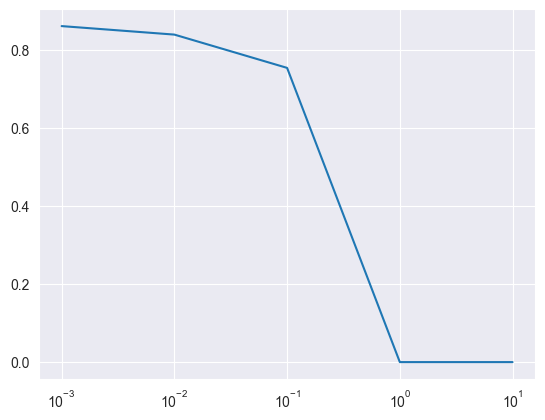

In [70]:
plt.semilogx(alphas, scores)

# With the best model params found:
We can now train the model with the best hyperparameters and the whole dataset.

In [72]:
best_alpha = 0.001 #According to above's results

best_estimator = Pipeline([
    ('make_higher_degree', pf), 
    ('scaler', s), 
    ('lasso_regression', Lasso(alpha=best_alpha, max_iter=100000))
])

best_estimator.fit(X, Y)
best_estimator.score(X, Y)

0.931909120740934

In [73]:
best_estimator.named_steps['lasso_regression'].coef_

array([ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.17428089, -0.60165534,  0.12361569,
        0.        , -0.        ,  0.01517189,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.2006199 , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.29095503,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.01649849,  0.        ,  0.72

# Ridge Regression
Ridge Regression helps minimize the sum of the squared residuals and the parameters’ squared values scaled by a factor (lambda or α).

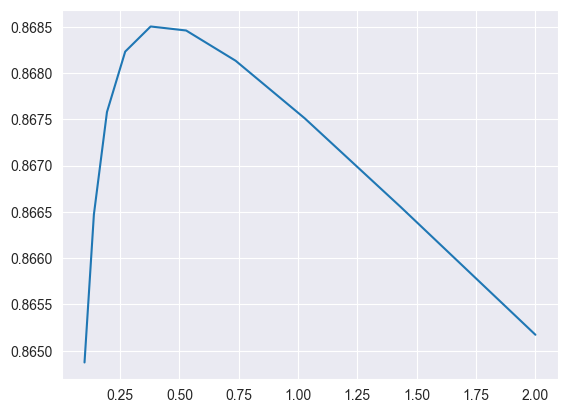

In [75]:
from sklearn.linear_model import Ridge

scores = []
alphas = np.geomspace(0.1, 2, 10)

for alpha in alphas:
    rid = Ridge(alpha=alpha)
    
    estimator = Pipeline([
        ('polynomial_features', PolynomialFeatures(degree=2)),
        ('scaler', s), 
        ('ridge_regression', rid)
    ])
    
    predictions = cross_val_predict(estimator, X, Y, cv=kf)
    
    score = r2_score(Y, predictions)
    
    scores.append(score)
    
plt.plot(alphas, scores)

# GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('scaler', s), 
    ('ridge_regression', Ridge())
])

parameters = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30), 
}

grid = GridSearchCV(estimator, parameters, cv=kf)

In [78]:
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [80]:
grid.best_score_, grid.best_params_

(np.float64(0.8603314421163265),
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': np.float64(4.0)})

In [83]:
y_predict = grid.predict(X)

In [84]:
r2_score(Y, y_predict)

0.8986705751280609

In [85]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00,  2.77900796e-02, -1.13077577e-01,  9.93068409e-02,
        8.18508198e-02,  9.24485776e-02,  1.99509985e-01,  1.77782186e-01,
       -2.44650058e-01,  2.47971974e-01,  1.09839897e-01,  1.10454767e-02,
        7.06174413e-02,  1.07897339e-01,  1.54523781e-01,  2.68203895e-02,
        5.92794270e-02,  2.17974003e-01, -1.74957137e-01, -7.35999087e-02,
       -4.97816511e-02, -8.60279062e-02, -2.58786859e-02,  8.68970618e-03,
        1.04822065e-02, -7.25152737e-02,  1.11523175e-02,  3.33628426e-02,
       -4.16429109e-02, -2.21812080e-02, -1.88982211e-02,  8.47480286e-02,
        5.01452910e-03, -4.69451667e-02, -4.67828314e-02,  1.25469384e-01,
        1.15319305e-01, -5.64261365e-02, -6.52757410e-02,  8.97968102e-02,
        4.61568764e-03,  6.45457662e-02, -1.31832230e-01,  9.50663769e-02,
       -6.11326135e-02,  1.37802130e-01,  9.67099250e-02, -6.38282441e-02,
        6.78919336e-02, -2.65580400e-01,  8.18508198e-02, -2.07125888e-01,
       -2.15868608e-01,  